In [3]:
import matplotlib.pyplot as plt
from random import randint
import heapq as hq


In [4]:
fs = [10, 100, 1000] #Third priority level gets 100X bytes per epoc than first priorty

RATE = 400 ## megabytes
qs = 600
epochs = 100 #for simplity, epoc is one second

class switch:
    def __init__(self):
        self.egress_queue = []
        
    def enqueue(self, priority, qs):
        if len(self.egress_queue) < qs:
            if priority > 10:
                numsent = randint(round(.2*priority), priority +1)
                
                for i in range(numsent):
                    if len(self.egress_queue) < qs:
                        hq.heappush(self.egress_queue,priority)
                    else:
                        #print("queue full, dropping packets")
                        break
            else:
                heads=randint(0,priority+1)
                for i in range(heads):
                    hq.heappush(self.egress_queue, priority)

    
    def dequeue(self):
        if len(self.egress_queue)==0:
            return -1
        else:
            return hq.heappop(self.egress_queue)
        
    
    
class pQueue:
    def __init__(self, r, fs, qs, epochs):
        self.r = r # rate of link
        self.fs = fs # a list of frequencies for each host
        #self.hostnames = hostnames #corresponding lists of hostnames
        self.switch = switch()
        self.QueueSize = qs
        self.epochs = epochs
        
    def epoch_simulation(self):
        epochs_sent = {self.fs[0]:[],self.fs[1]:[],self.fs[2]:[]}
        for epoch in range(self.epochs):
            epoch_packets = {self.fs[0]:0,self.fs[1]:0,self.fs[2]:0}
            for f in self.fs:
                self.switch.enqueue(f, self.QueueSize)
                    
            for i in range(self.r):
                y=self.switch.dequeue()
                if y == -1:
                    break
                else:
                    epoch_packets[y]+=1
            epochs_sent[self.fs[0]].append(epoch_packets[self.fs[0]])
            epochs_sent[self.fs[1]].append(epoch_packets[self.fs[1]])
            epochs_sent[self.fs[2]].append(epoch_packets[self.fs[2]])
        
        return epochs_sent
    

  
    
    
jQueue = pQueue(RATE, fs, qs, epochs)

eps = jQueue.epoch_simulation()
         

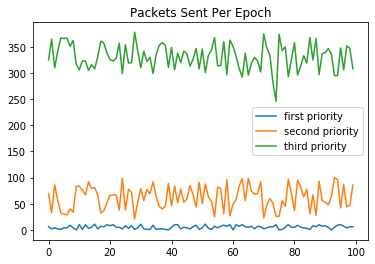

In [5]:
plt.plot(eps[10], label = "first priority")
plt.plot(eps[100], label = "second priority")
plt.plot(eps[1000], label = "third priority")
plt.legend()
plt.title("Packets Sent Per Epoch")
plt.savefig("packets.png")
